In [1]:


import numpy as np 
import pandas as pd 


import matplotlib.pyplot as plt
import os


In [2]:
df=pd.read_csv('dataset.csv')

In [3]:
df.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [ ]:
# df['Result'].unique()

In [5]:
df.shape

(11055, 32)

C:\Users\Saran\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Result', ylabel='count'>

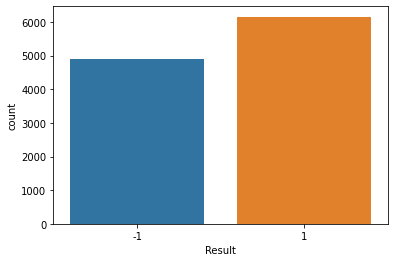

In [6]:
import seaborn as sns
sns.countplot(df['Result'])

In [7]:

col=df.columns
for i in col:
     if  i!='index':
        print(i,df[i].unique())

having_IPhaving_IP_Address [-1  1]
URLURL_Length [ 1  0 -1]
Shortining_Service [ 1 -1]
having_At_Symbol [ 1 -1]
double_slash_redirecting [-1  1]
Prefix_Suffix [-1  1]
having_Sub_Domain [-1  0  1]
SSLfinal_State [-1  1  0]
Domain_registeration_length [-1  1]
Favicon [ 1 -1]
port [ 1 -1]
HTTPS_token [-1  1]
Request_URL [ 1 -1]
URL_of_Anchor [-1  0  1]
Links_in_tags [ 1 -1  0]
SFH [-1  1  0]
Submitting_to_email [-1  1]
Abnormal_URL [-1  1]
Redirect [0 1]
on_mouseover [ 1 -1]
RightClick [ 1 -1]
popUpWidnow [ 1 -1]
Iframe [ 1 -1]
age_of_domain [-1  1]
DNSRecord [-1  1]
web_traffic [-1  0  1]
Page_Rank [-1  1]
Google_Index [ 1 -1]
Links_pointing_to_page [ 1  0 -1]
Statistical_report [-1  1]
Result [-1  1]


In [8]:

df['Result']=df['Result'].replace(-1,0)

In [9]:
df.shape

(11055, 32)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score

X= df.drop(columns=['Result','index'])
Y=df['Result']

train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.3,random_state=2)

In [11]:
print(test_X.shape)

(3317, 30)


In [12]:
ac=[]
from lib.utils import *


from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier(n_neighbors=3)
model.fit(train_X, train_Y)
y_pred = model.predict(test_X)
ac.append(accuracy_score(y_pred,test_Y)*100)
ac

[91.33]

In [13]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


smooth_svm = make_pipeline(
    StandardScaler(),
    SVC(kernel='rbf', C=1.0)
)


smooth_svm.fit(train_X, train_Y)




y_pred = smooth_svm.predict(test_X)

ac.append(accuracy_score(y_pred,test_Y,sample_weight=0.2)*100)
ac

[91.33, 97.00999999999999]

In [14]:
import pickle
pickled_model = pickle.load(open('model.pkl', 'rb'))


C:\Users\Saran\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Saran\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.22 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [15]:
c=pickled_model.predict([[1,0 ,1 ,1 ,1,1 , 0 , 1, -1 ,-1 , 1  ,1 ,-1 ,1, -1 ,-1 ,-1, -1 , 1, -1, -1 ,-1 , 1 ,-1,
  -1 ,-1 ,-1 , 1 , 1 , 1]])

In [16]:
print(c)

[1]


the accuracy of KNN is 91.33 and Smooth SVM is 97.00999999999999


C:\Users\Saran\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(50.0, 100.0)

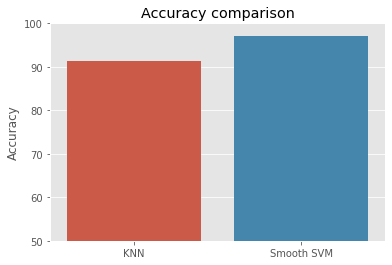

In [17]:
import numpy as np
import seaborn as sns
import matplotlib as plt

plt.style.use('ggplot')
x=['KNN','Smooth SVM']
ac=ac
ax=sns.barplot(x,ac)
ax.set_title('Accuracy comparison')
ax.set_ylabel('Accuracy')
#ax.yaxis.set_major_locator(ticker.LinearLocator())
print("the accuracy of {} is {} and {} is {}".format(x[0],ac[0],x[1],ac[1]))
ax.set_ylim(50,100)